In [21]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import quandl
sns.set_style('whitegrid')

%matplotlib inline

In [22]:
from pandas_datareader.data import DataReader
from datetime import datetime

In [23]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

In [24]:
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

In [25]:
for stock in tech_list:   
    globals()[stock] = quandl.get('WIKI/{}'.format(stock), start_date=start, end_date=end)

In [27]:
AAPL.describe()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
count,250.000000,250.000000,250.000000,250.000000,2.500000e+02,250.000000,250.0,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,151.090170,152.054932,150.121624,151.187174,2.667099e+07,0.007320,1.0,150.512726,151.473709,149.546993,150.608642,2.667099e+07
std,14.445403,14.526156,14.188472,14.329641,1.109759e+07,0.066626,0.0,14.929353,15.013082,14.668609,14.813216,1.109759e+07
min,116.780000,118.160000,116.470000,117.910000,1.394898e+07,0.000000,1.0,115.337596,116.700551,115.031425,116.453639,1.394898e+07
25%,142.555000,143.387500,141.332500,142.312500,2.024975e+07,0.000000,1.0,141.410203,142.320073,140.187687,141.388432,2.024975e+07
50%,153.280000,153.935000,151.900000,152.980000,2.380380e+07,0.000000,1.0,152.587332,153.362739,151.395720,152.132729,2.380380e+07
75%,160.050000,160.945000,158.765000,159.955000,2.927839e+07,0.000000,1.0,160.050000,160.837500,158.737500,159.880000,2.927839e+07
max,175.110000,177.200000,174.860000,176.420000,1.119850e+08,0.630000,1.0,175.110000,177.200000,174.860000,176.420000,1.119850e+08


In [28]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2017-01-06 to 2018-01-05
Data columns (total 12 columns):
Open           250 non-null float64
High           250 non-null float64
Low            250 non-null float64
Close          250 non-null float64
Volume         250 non-null float64
Ex-Dividend    250 non-null float64
Split Ratio    250 non-null float64
Adj. Open      250 non-null float64
Adj. High      250 non-null float64
Adj. Low       250 non-null float64
Adj. Close     250 non-null float64
Adj. Volume    250 non-null float64
dtypes: float64(12)
memory usage: 25.4 KB


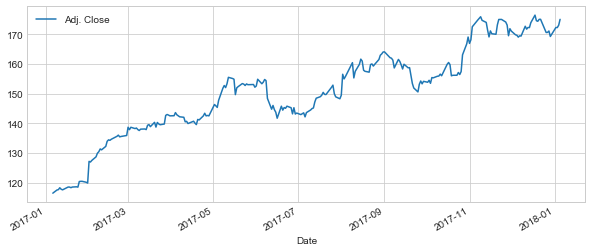

In [29]:
AAPL['Adj. Close'].plot(legend=True, figsize=(10, 4))

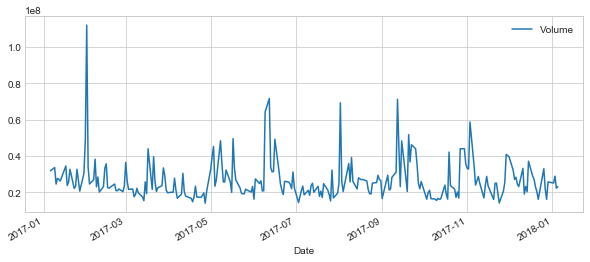

In [30]:
AAPL['Volume'].plot(legend=True, figsize=(10, 4))

In [34]:
ma_day = [10, 20, 50]
for ma in ma_day:
    column_name = 'MA {}'.format(ma)
    AAPL[column_name] = AAPL['Adj. Close'].rolling(window=ma,center=False).mean()#pd.rolling_mean(AAPL['Adj. Close'], ma)

In [35]:
AAPL.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,MA 10,MA 20,MA 50
Date,,,,,,,,,,,,,,,
2017-01-06,116.780,118.16,116.47,117.91,31751900.0,0.0,1.0,115.337596,116.700551,115.031425,116.453639,31751900.0,NaN,NaN,NaN
2017-01-09,117.950,119.43,117.94,118.99,33561948.0,0.0,1.0,116.493145,117.954865,116.483269,117.520300,33561948.0,NaN,NaN,NaN
2017-01-10,118.770,119.38,118.30,119.11,24462051.0,0.0,1.0,117.303017,117.905483,116.838822,117.638817,24462051.0,NaN,NaN,NaN
2017-01-11,118.740,119.93,118.60,119.75,27588593.0,0.0,1.0,117.273388,118.448689,117.135117,118.270913,27588593.0,NaN,NaN,NaN
2017-01-12,118.895,119.30,118.21,119.25,27086220.0,0.0,1.0,117.426473,117.826471,116.749934,117.777088,27086220.0,NaN,NaN,NaN


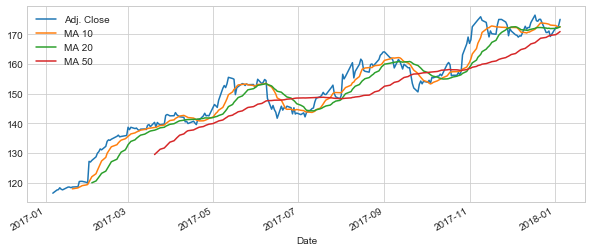

In [36]:
AAPL[['Adj. Close', 'MA 10', 'MA 20', 'MA 50']].plot(subplots=False, figsize=(10, 4))

In [37]:
AAPL['Daily Return'] = AAPL['Adj. Close'].pct_change()

In [39]:
AAPL.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,MA 10,MA 20,MA 50,Daily Return
Date,,,,,,,,,,,,,,,,
2017-01-06,116.780,118.16,116.47,117.91,31751900.0,0.0,1.0,115.337596,116.700551,115.031425,116.453639,31751900.0,NaN,NaN,NaN,NaN
2017-01-09,117.950,119.43,117.94,118.99,33561948.0,0.0,1.0,116.493145,117.954865,116.483269,117.520300,33561948.0,NaN,NaN,NaN,0.009160
2017-01-10,118.770,119.38,118.30,119.11,24462051.0,0.0,1.0,117.303017,117.905483,116.838822,117.638817,24462051.0,NaN,NaN,NaN,0.001008
2017-01-11,118.740,119.93,118.60,119.75,27588593.0,0.0,1.0,117.273388,118.448689,117.135117,118.270913,27588593.0,NaN,NaN,NaN,0.005373
2017-01-12,118.895,119.30,118.21,119.25,27086220.0,0.0,1.0,117.426473,117.826471,116.749934,117.777088,27086220.0,NaN,NaN,NaN,-0.004175


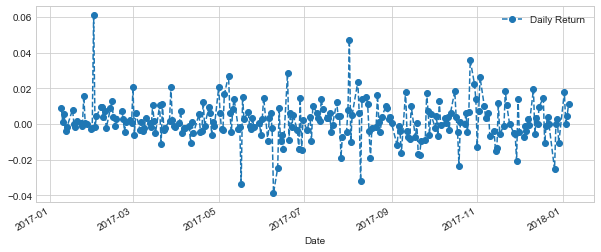

In [41]:
AAPL['Daily Return'].plot(figsize=(10,4), legend=True, linestyle='--', marker='o')

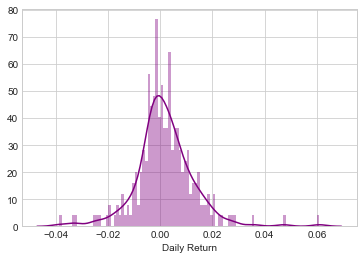

In [42]:
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='purple')

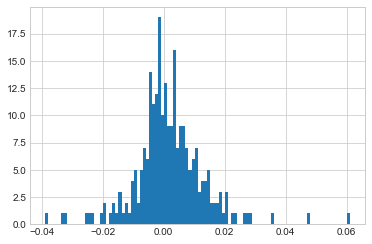

In [44]:
AAPL['Daily Return'].hist(bins=100)

In [55]:
list(map(lambda x: 'WIKI/' + x, tech_list))

['WIKI/AAPL', 'WIKI/GOOG', 'WIKI/MSFT', 'WIKI/AMZN']

In [64]:
list(map(lambda x: 'WIKI/{} - Adj. Close'.format(x), tech_list))

['WIKI/AAPL - Adj. Close',
 'WIKI/GOOG - Adj. Close',
 'WIKI/MSFT - Adj. Close',
 'WIKI/AMZN - Adj. Close']

In [65]:
closing_df = quandl.get(list(map(lambda x: 'WIKI/' + x, tech_list)), start_date=start, end_date=end)[list(map(lambda x: 'WIKI/{} - Adj. Close'.format(x), tech_list))]

In [66]:
closing_df.head()

,WIKI/AAPL - Adj. Close,WIKI/GOOG - Adj. Close,WIKI/MSFT - Adj. Close,WIKI/AMZN - Adj. Close
Date,,,,
2017-01-06,116.453639,806.15,61.473488,795.99
2017-01-09,117.520300,806.65,61.277837,796.92
2017-01-10,117.638817,804.79,61.258272,795.90
2017-01-11,118.270913,807.91,61.815877,799.02
2017-01-12,117.777088,806.36,61.248489,813.64


In [67]:
closing_df.columns = tech_list

In [68]:
closing_df.head()

,AAPL,GOOG,MSFT,AMZN
Date,,,,
2017-01-06,116.453639,806.15,61.473488,795.99
2017-01-09,117.520300,806.65,61.277837,796.92
2017-01-10,117.638817,804.79,61.258272,795.90
2017-01-11,118.270913,807.91,61.815877,799.02
2017-01-12,117.777088,806.36,61.248489,813.64


In [69]:
tech_rets = closing_df.pct_change()

In [70]:
tech_rets.head()

,AAPL,GOOG,MSFT,AMZN
Date,,,,
2017-01-06,NaN,NaN,NaN,NaN
2017-01-09,0.009160,0.000620,-0.003183,0.001168
2017-01-10,0.001008,-0.002306,-0.000319,-0.001280
2017-01-11,0.005373,0.003877,0.009103,0.003920
2017-01-12,-0.004175,-0.001919,-0.009179,0.018297


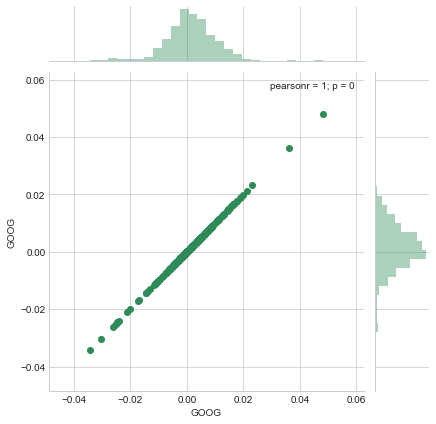

In [71]:
sns.jointplot('GOOG', 'GOOG', tech_rets, kind='scatter', color='seagreen')

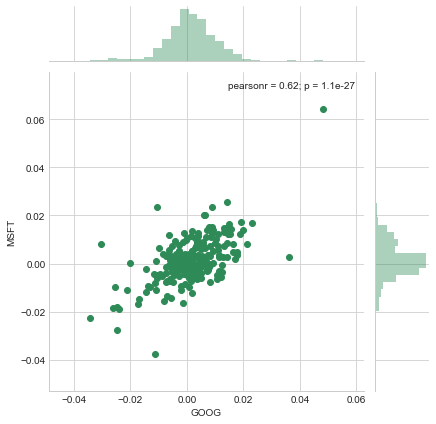

In [72]:
sns.jointplot('GOOG', 'MSFT', tech_rets, kind='scatter', color='seagreen')

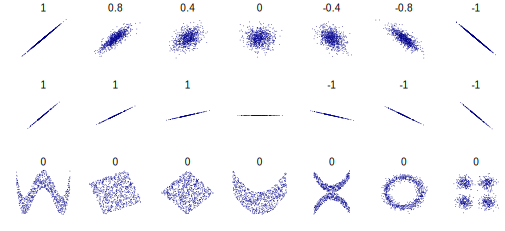

In [73]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

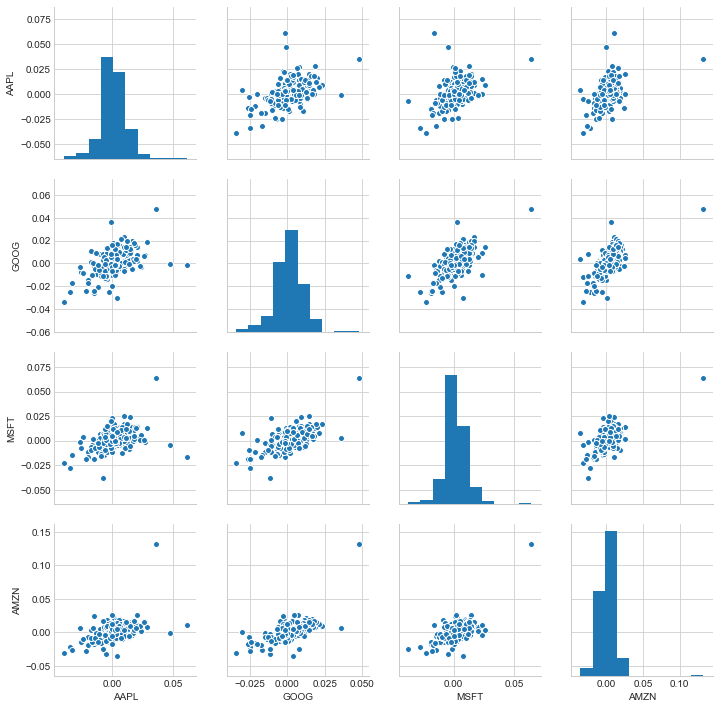

In [74]:
sns.pairplot(tech_rets.dropna())

/Users/yuyataki/.pyenv/versions/anaconda3-4.2.0/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


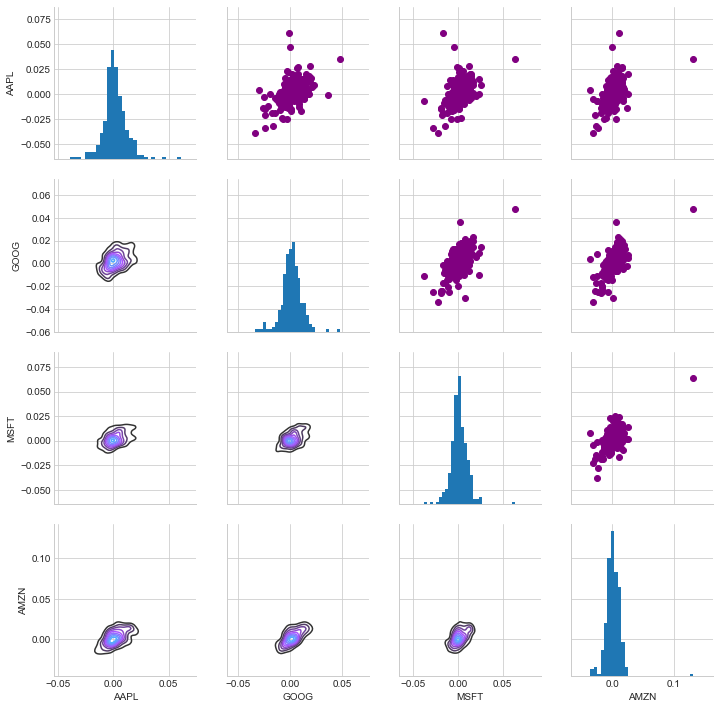

In [78]:
returns_fig = sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter, color='purple')
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')
returns_fig.map_diag(plt.hist, bins=30)

/Users/yuyataki/.pyenv/versions/anaconda3-4.2.0/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


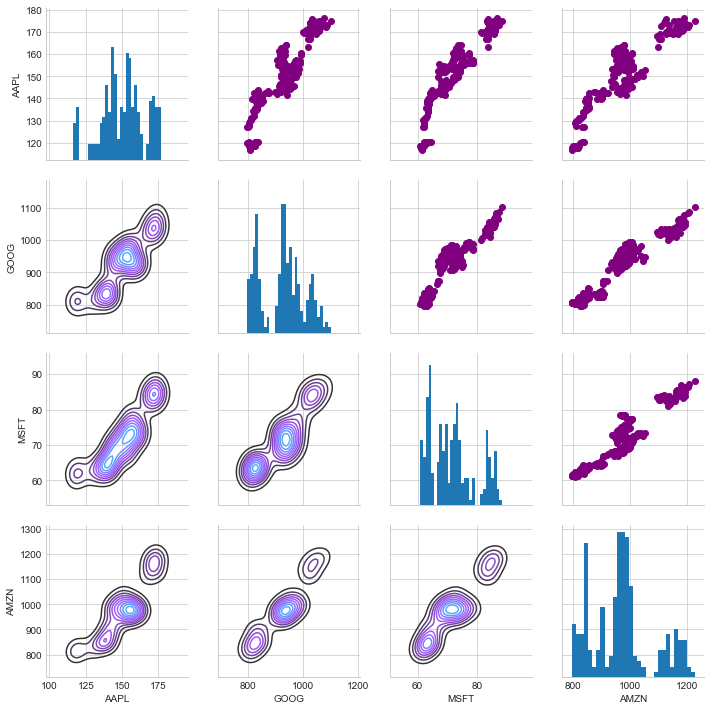

In [80]:
returns_fig = sns.PairGrid(closing_df.dropna())
returns_fig.map_upper(plt.scatter, color='purple')
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')
returns_fig.map_diag(plt.hist, bins=30)

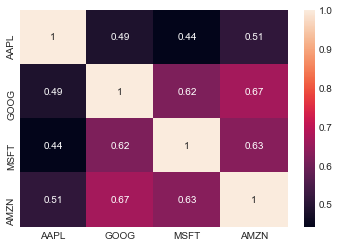

In [81]:
sns.heatmap(tech_rets.corr(), annot=True)

In [82]:
rets = tech_rets.dropna()

In [83]:
rets.head()

,AAPL,GOOG,MSFT,AMZN
Date,,,,
2017-01-09,0.009160,0.000620,-0.003183,0.001168
2017-01-10,0.001008,-0.002306,-0.000319,-0.001280
2017-01-11,0.005373,0.003877,0.009103,0.003920
2017-01-12,-0.004175,-0.001919,-0.009179,0.018297
2017-01-13,-0.001761,0.001885,0.001437,0.004302


In [84]:
rets.mean() # 収益と捉える

AAPL    0.001700
GOOG    0.001299
MSFT    0.001509
AMZN    0.001830
dtype: float64

In [85]:
rets.std() # リスクと捉える

AAPL    0.011241
GOOG    0.009785
MSFT    0.009363
AMZN    0.013155
dtype: float64

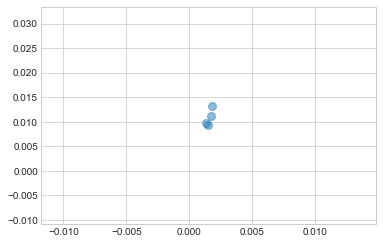

In [86]:
plt.scatter(rets.mean(), rets.std(), alpha=0.5, s=np.pi*20) # sはエリア

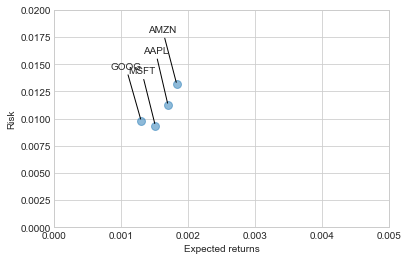

In [94]:
plt.scatter(rets.mean(), rets.std(), alpha=0.5, s=np.pi*20) # sはエリア
plt.ylim([0, 0.02])
plt.xlim([0, 0.005])
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x,y), xytext=(0,50),
                textcoords = 'offset points', ha = 'right', va = 'bottom',
                arrowprops = dict(arrowstyle='-', connectionstyle='arc3'))

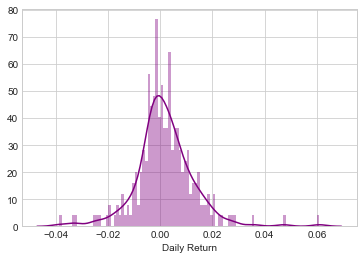

In [98]:
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='purple')

In [99]:
rets['AAPL'].quantile(0.05)

-0.014967807053671178

In [100]:
days = 365
dt = 1 / days
mu = rets.mean()['GOOG']
sigma = rets.std()['GOOG']

In [111]:
def stock_monte_carlo(start_price, days, mu, sigma):
    price = np.zeros(days)
    price[0] = start_price
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1, days):
        # shockはεを正規分布として計算。
        shock[x] = np.random.normal(loc=mu*dt, scale=sigma * np.sqrt(dt))
        drift[x] = mu * dt
        price[x] = price[x-1] + (price[x-1]*(drift[x]+shock[x]))
    return price

In [112]:
GOOG.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2017-01-06,795.26,807.9000,792.2041,806.15,1640170.0,0.0,1.0,795.26,807.9000,792.2041,806.15,1640170.0
2017-01-09,806.40,809.9664,802.8300,806.65,1274645.0,0.0,1.0,806.40,809.9664,802.8300,806.65,1274645.0
2017-01-10,807.86,809.1299,803.5100,804.79,1176780.0,0.0,1.0,807.86,809.1299,803.5100,804.79,1176780.0
2017-01-11,805.00,808.1500,801.3700,807.91,1065936.0,0.0,1.0,805.00,808.1500,801.3700,807.91,1065936.0
2017-01-12,807.14,807.3900,799.1700,806.36,1353057.0,0.0,1.0,807.14,807.3900,799.1700,806.36,1353057.0


In [116]:
start_price = GOOG.iloc[0,10]

In [117]:
start_price

806.14999999999998

Text(0.5,1,'Monte Car Analysys')

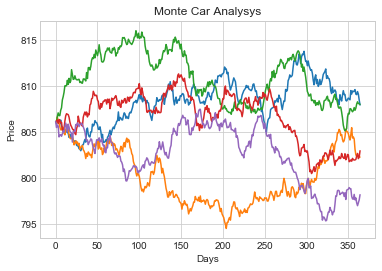

In [118]:
for run in range(5):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Car Analysys')

In [128]:
runs = 10000
simulations = np.zeros(runs)
np.set_printoptions(threshold=5)
print(simulations)
for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price, days, mu, sigma)[days -1]

[ 0.  0.  0. ...,  0.  0.  0.]


(array([ 1.,  0.,  0., ...,  0.,  0.,  1.]),
 array([ 776.72063016,  777.04832821,  777.37602626, ...,  841.6048436 ,
         841.93254165,  842.2602397 ]),
 <a list of 200 Patch objects>)

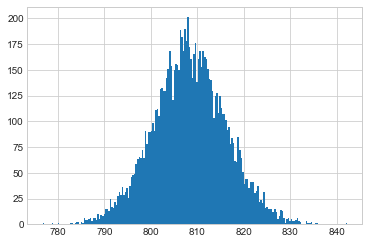

In [129]:
plt.hist(simulations, bins=200)

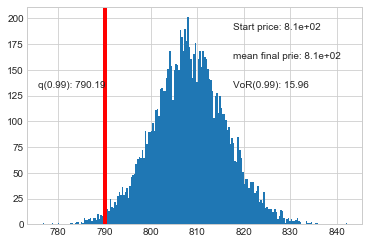

In [132]:
q = np.percentile(simulations, 1)
plt.hist(simulations, bins=200)
plt.figtext(0.6, 0.8, s='Start price: {:0.2}'.format(start_price))
plt.figtext(0.6, 0.7, 'mean final prie: {:0.2}'.format(simulations.mean()))
plt.figtext(0.6, 0.6, 'VoR(0.99): {:0.2f}'.format(start_price - q))
plt.figtext(0.15, 0.6, 'q(0.99): {:0.2f}'.format(q))

plt.axvline(x = q, linewidth=4, color='r')